In [61]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
CSV_DIR = 'data'
train_csv = pd.read_csv(f"{CSV_DIR}/train.csv")
val_csv = pd.read_csv(f"{CSV_DIR}/val.csv")
test_csv = pd.read_csv(f"{CSV_DIR}/test.csv")
df_pen_mark = pd.read_csv(f"{CSV_DIR}/without_pen_mask.csv")
# union_csv = 

In [72]:
union_df = pd.concat([train_csv, val_csv, test_csv], axis=0, ignore_index=True).drop(columns=['Unnamed: 0'], errors='ignore')

df = union_df[~union_df['image_id'].isin(df_pen_mark['image_id'])]

In [74]:
print(union_df.shape)
print(df.shape)

(10616, 4)
(9954, 4)


In [76]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.15,  # 30% dos dados vão para validação + teste
    stratify=df['isup_grade'],  # Coluna para estratificar
    random_state=42
)

In [79]:
print(train_df.shape)
print(test_df.shape)

(8460, 4)
(1494, 4)


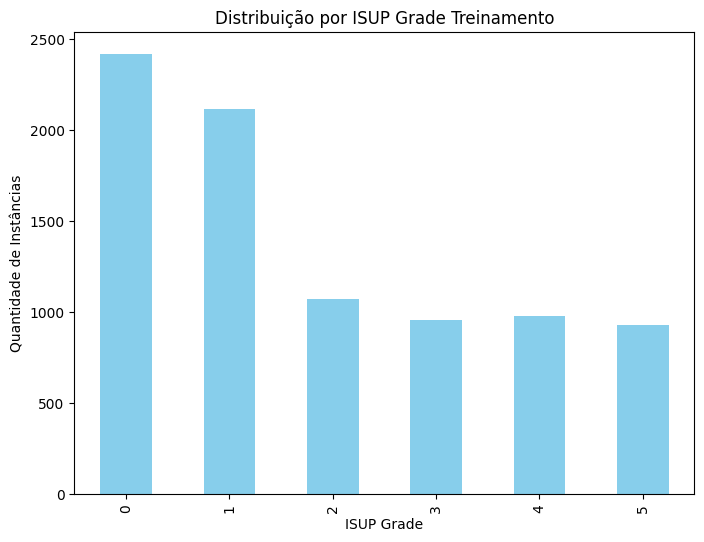

In [77]:
counts = train_df["isup_grade"].value_counts()
counts.sort_index().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('ISUP Grade')
plt.ylabel('Quantidade de Instâncias')
plt.title('Distribuição por ISUP Grade Treinamento')
plt.show()

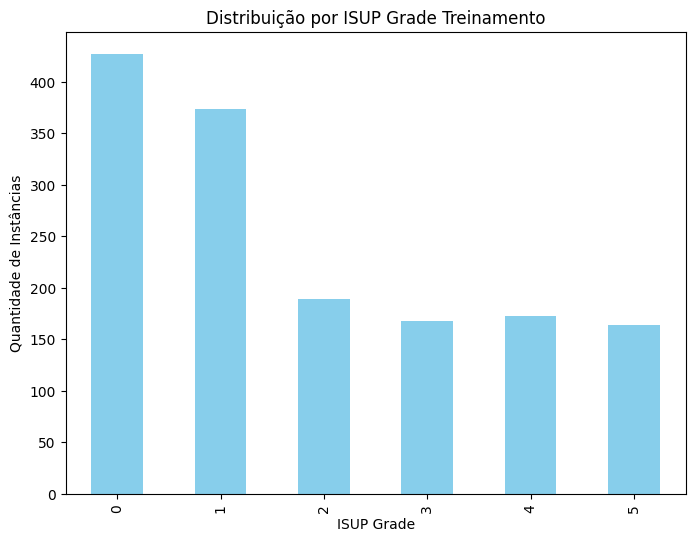

In [78]:
counts = test_df["isup_grade"].value_counts()
counts.sort_index().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.xlabel('ISUP Grade')
plt.ylabel('Quantidade de Instâncias')
plt.title('Distribuição por ISUP Grade Treinamento')
plt.show()

In [ ]:
df.to_csv(f"{CSV_DIR}/clean/df.csv")
train_df.to_csv(f"{CSV_DIR}/clean/train.csv")
test_df.to_csv(f"{CSV_DIR}/clean/test.csv")